In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
%pylab inline
import matplotlib.mlab as mlab
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
master = pd.read_csv('Data/simplified_master.csv')
master = master.rename(columns={'Unnamed: 0':'District'})

In [3]:
len(master)

75

In [4]:
#cols = master.columns.tolist()
#print(cols)
master = master.rename(columns={'STD/STI3':'STD', 'HIV/AIDS3':'HIVAIDS'})
master.rename(columns=lambda x: x.replace(' ',''), inplace=True)
master.rename(columns=lambda x: x.replace('/',''), inplace=True)
master.rename(columns=lambda x: x.replace('(',''), inplace=True)
master.rename(columns=lambda x: x.replace(')',''), inplace=True)
master.rename(columns=lambda x: x.replace('-',''), inplace=True)
master.rename(columns=lambda x: x.replace('%',''), inplace=True)
master.rename(columns=lambda x: x.replace('+',''), inplace=True)
master.rename(columns=lambda x: x.replace('<',''), inplace=True)

In [5]:
master.columns

Index([u'District', u'Foreigner', u'HillBrahman', u'HillChhetree',
       u'HillDalit', u'MadhesiBrahmanChhetree', u'MadhesiDalit',
       u'MadhesiOtherOCA', u'MadhesiOtherOCB', u'MtnHillJanajatiA',
       u'MtnHillJanajatiB', u'Musalman', u'Newar', u'OtherMPB',
       u'Otherundefined', u'TaraiJanajati', u'PovertySeverity',
       u'Adultilliteracyrate', u'Children5yearsmalnourished',
       u'SanitationCoverage', u'SexRatiomaleper100female',
       u'ConfirmedMeningitis3', u'HIVAIDS', u'Leprosy3', u'STD',
       u'AcuteFlacidParalysis', u'Chickenpox', u'Diptheria', u'HepatatisB',
       u'Measles', u'Mumps', u'NeonatalTetanus', u'Rubella', u'Tetanus',
       u'Tuberculosis', u'Whoopingcough', u'Alcoholism', u'AnxietyNeurosis',
       u'Conversivedisorder\nHysteria', u'Depression', u'Epilesy',
       u'Mentalretardation', u'Psychosis', u'caste_diversity', u'Vacc_Access'],
      dtype='object')

In [6]:
master = master.drop(['ConfirmedMeningitis3', 'Leprosy3', 'AcuteFlacidParalysis', 'Chickenpox', 'Diptheria',\
                      'HepatatisB', 'Measles', 'Mumps', 'NeonatalTetanus', 'Rubella', 'Tetanus',\
                      'Tuberculosis', 'Whoopingcough', 'Alcoholism', 'AnxietyNeurosis', 'Conversivedisorder\nHysteria',\
                      'Depression', 'Epilesy', 'Mentalretardation', 'Psychosis'], axis=1)

In [7]:
master.head(2)

,District,Foreigner,HillBrahman,HillChhetree,HillDalit,MadhesiBrahmanChhetree,MadhesiDalit,MadhesiOtherOCA,MadhesiOtherOCB,MtnHillJanajatiA,...,TaraiJanajati,PovertySeverity,Adultilliteracyrate,Children5yearsmalnourished,SanitationCoverage,SexRatiomaleper100female,HIVAIDS,STD,caste_diversity,Vacc_Access
0,Achham,0.0,0.102036,0.581749,0.135158,0.000101,0.000000,0.004921,0.0,0.006921,...,0.001002,0.047,54.92,0.592,19.08,87.0,0.00336,0.002750,0.393517,1.427767
1,Arghakhanchi,0.0,0.327665,0.193248,0.209020,0.001604,0.000066,0.001058,0.0,0.193349,...,0.001184,0.024,34.43,0.310,46.20,77.0,0.00000,0.003334,0.227857,0.054958


In [8]:
x = master.drop(['HIVAIDS', 'STD'],axis=1)
std = master['STD']
hiv = master['HIVAIDS']

In [9]:
std2 = pd.concat([x, std], axis=1)
hiv2 = pd.concat([x, hiv], axis=1)

In [10]:
std2.columns

Index([u'District', u'Foreigner', u'HillBrahman', u'HillChhetree',
       u'HillDalit', u'MadhesiBrahmanChhetree', u'MadhesiDalit',
       u'MadhesiOtherOCA', u'MadhesiOtherOCB', u'MtnHillJanajatiA',
       u'MtnHillJanajatiB', u'Musalman', u'Newar', u'OtherMPB',
       u'Otherundefined', u'TaraiJanajati', u'PovertySeverity',
       u'Adultilliteracyrate', u'Children5yearsmalnourished',
       u'SanitationCoverage', u'SexRatiomaleper100female', u'caste_diversity',
       u'Vacc_Access', u'STD'],
      dtype='object')

In [11]:
hiv2.columns

Index([u'District', u'Foreigner', u'HillBrahman', u'HillChhetree',
       u'HillDalit', u'MadhesiBrahmanChhetree', u'MadhesiDalit',
       u'MadhesiOtherOCA', u'MadhesiOtherOCB', u'MtnHillJanajatiA',
       u'MtnHillJanajatiB', u'Musalman', u'Newar', u'OtherMPB',
       u'Otherundefined', u'TaraiJanajati', u'PovertySeverity',
       u'Adultilliteracyrate', u'Children5yearsmalnourished',
       u'SanitationCoverage', u'SexRatiomaleper100female', u'caste_diversity',
       u'Vacc_Access', u'HIVAIDS'],
      dtype='object')

### random forest model for std
All vars

In [12]:
rfr = RandomForestRegressor(random_state=100,oob_score=True)
rfr.fit(std2.iloc[:,1:23], std2['STD'])
all_vars_score_std = rfr.score(std2.iloc[:,1:23], std2['STD'])
print all_vars_score_std
all_vars_oob_score_std = rfr.oob_score_
print all_vars_oob_score_std

0.832594516933
-0.441656899851


/Users/kristikorsberg/devel/venv/lib/python2.7/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [13]:
estimates = pd.DataFrame()
estimates['vars'] = [elem for elem in std2.columns[1:23]]
estimates['sig'] = rfr.feature_importances_
estimates.sort_values(by='sig', ascending=False).head()

,vars,sig
17,Children5yearsmalnourished,0.212601
15,PovertySeverity,0.165577
9,MtnHillJanajatiB,0.082420
14,TaraiJanajati,0.071904
3,HillDalit,0.064274


In [14]:
mse = pd.DataFrame()
mse['district'] = std2['District']
mse['actual'] = std2['STD']
mse['pred'] = rfr.oob_prediction_
mse['actual-pred'] = np.abs(mse['actual']-mse['pred'])
mse['error'] = np.square(mse['actual-pred'])
mse.sort_values(by='error').head()

,district,actual,pred,actual-pred,error
59,Sankhuwasabha,0.000510,0.000489,0.000021,4.437776e-10
47,Palpa,0.000685,0.000646,0.000039,1.531405e-09
19,Dolpa,0.002044,0.001995,0.000048,2.321900e-09
68,Syangja,0.001307,0.001254,0.000053,2.801544e-09
17,Dhanusa,0.000745,0.000799,0.000054,2.954407e-09


### decision tree for std with significant random forest vars

In [15]:
estimates[estimates['sig']>.05]['vars'].unique()

array(['HillDalit', 'MtnHillJanajatiB', 'TaraiJanajati', 'PovertySeverity',
       'Children5yearsmalnourished'], dtype=object)

In [16]:
model = DecisionTreeRegressor(random_state=100)
vals = {'max_leaf_nodes':[i for i in range(5,20)]}
grid = GridSearchCV(estimator=model, param_grid=vals)
grid.fit(std2.loc[:,[elem for elem in estimates[estimates['sig']>.05]['vars'].unique()]], std2['STD'])

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=100,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=5, min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [18]:
best = grid.best_estimator_
best.fit(std2.loc[:,[elem for elem in estimates[estimates['sig']>.05]['vars'].unique()]], std2['STD'])
print best.score(std2.loc[:,[elem for elem in estimates[estimates['sig']>.05]['vars'].unique()]], std2['STD'])

0.570229400039


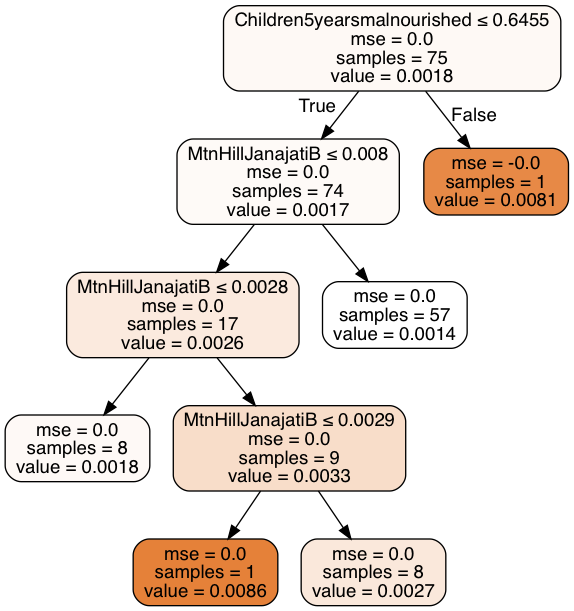

In [19]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(best, out_file=dot_data,  
                         feature_names=[elem for elem in estimates[estimates['sig']>.05]['vars'].unique()],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [20]:
model.fit(std2.loc[:,[elem for elem in estimates[estimates['sig']>.05]['vars'].unique()]], std2['STD'])
print model.score(std2.loc[:,[elem for elem in estimates[estimates['sig']>.05]['vars'].unique()]], std2['STD'])

0.989782700081


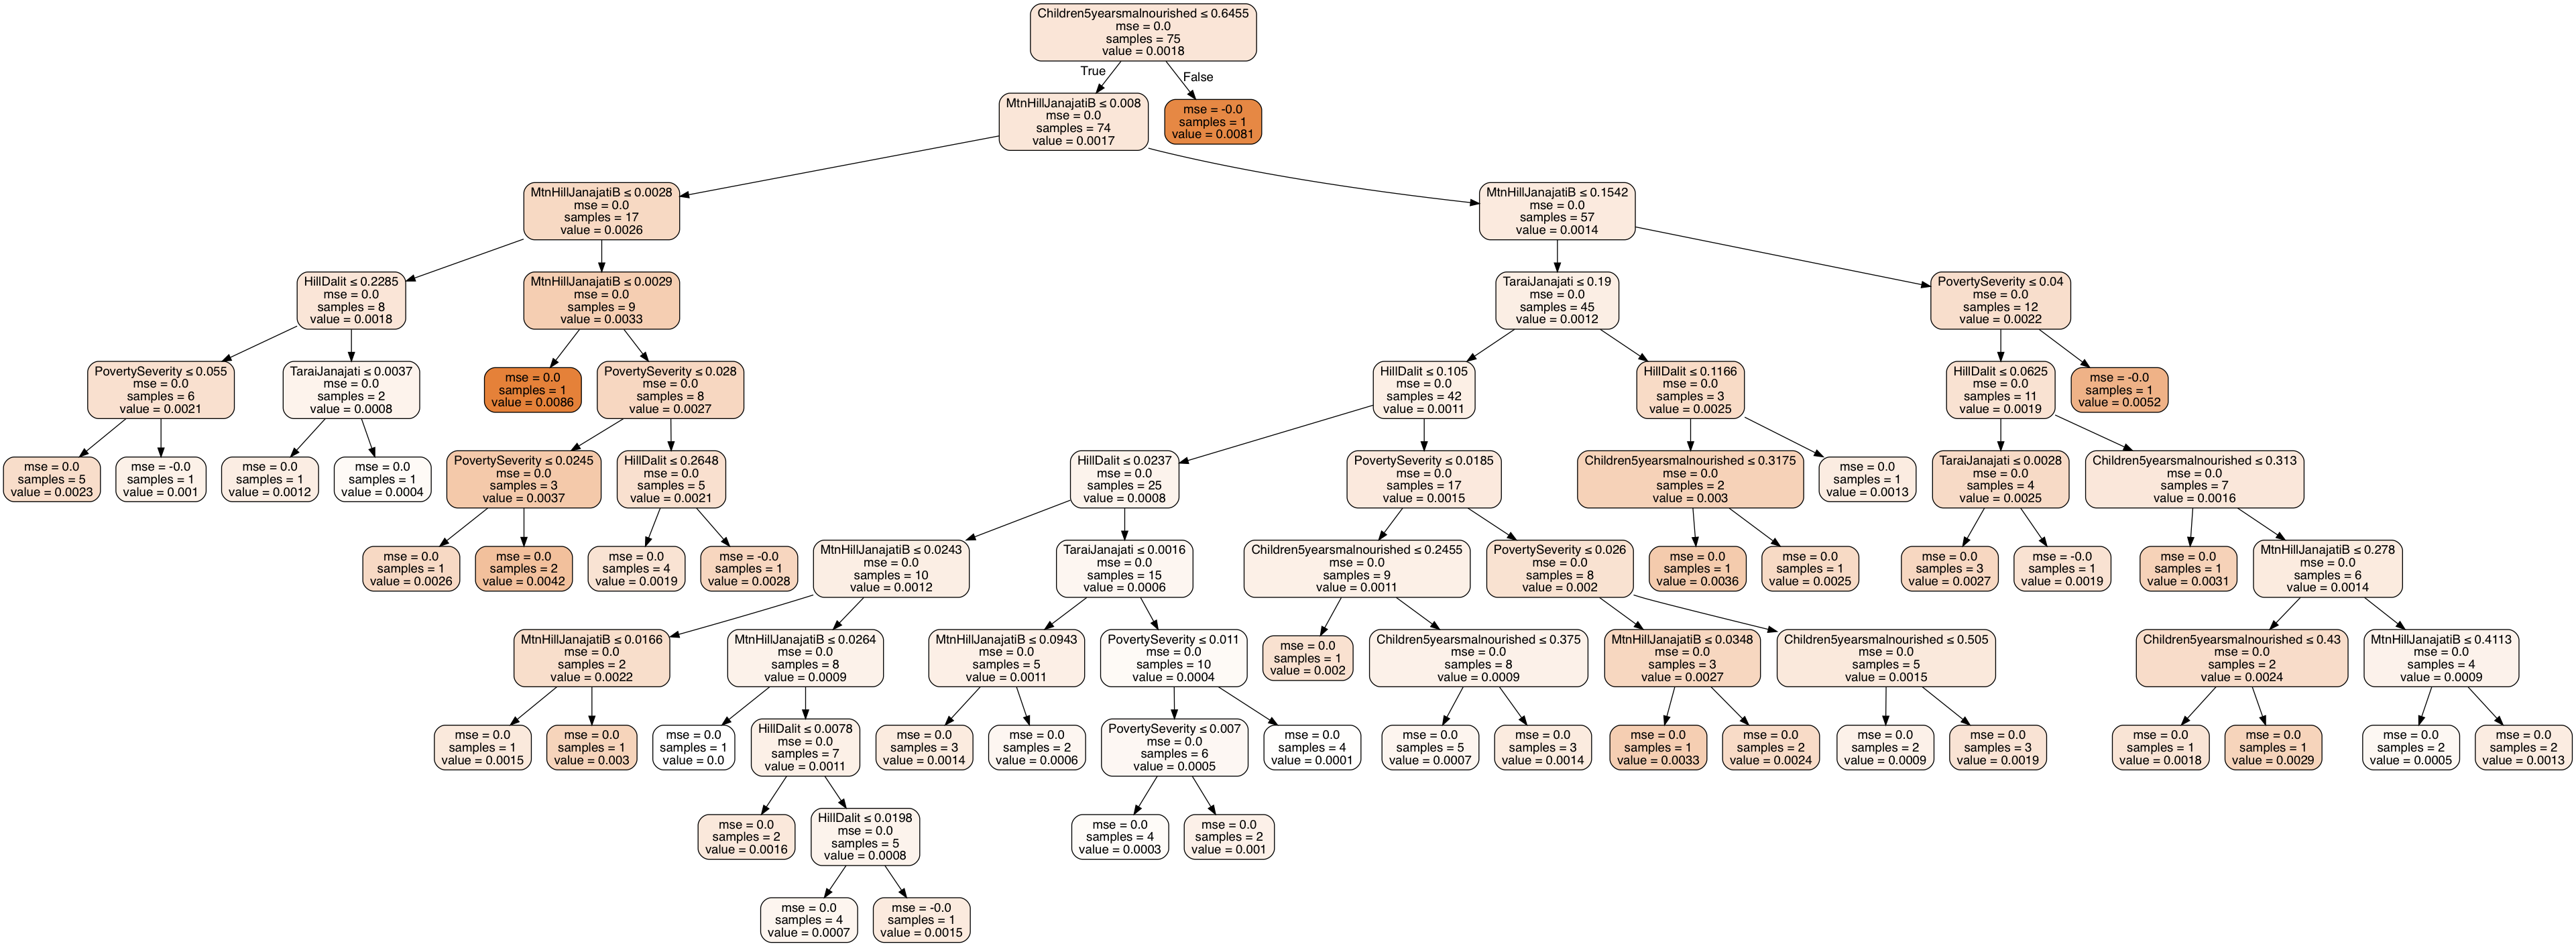

In [21]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=[elem for elem in estimates[estimates['sig']>.05]['vars'].unique()],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### rfr model for hiv
All vars

In [22]:
rfr = RandomForestRegressor(random_state=100,oob_score=True)
rfr.fit(hiv2.iloc[:,1:23], hiv2['HIVAIDS'])
all_vars_score_hiv = rfr.score(hiv2.iloc[:,1:23], hiv2['HIVAIDS'])
print all_vars_score_hiv
all_vars_oob_score_hiv = rfr.oob_score_
print all_vars_oob_score_hiv

0.789376336264
-0.272070565759


In [23]:
estimates = pd.DataFrame()
estimates['vars'] = [elem for elem in hiv2.columns[1:23]]
estimates['sig'] = rfr.feature_importances_
estimates.sort_values(by='sig',ascending=False).head()

,vars,sig
13,Otherundefined,0.338068
17,Children5yearsmalnourished,0.282737
15,PovertySeverity,0.179195
0,Foreigner,0.000000
1,HillBrahman,0.000000


In [24]:
mse = pd.DataFrame()
mse['district'] = hiv2['District']
mse['actual'] = hiv2['HIVAIDS']
mse['pred'] = rfr.oob_prediction_
mse['actual-pred'] = np.abs(mse['actual']-mse['pred'])
mse['error'] = np.square(mse['actual-pred'])
mse.sort_values(by='error').head()

,district,actual,pred,actual-pred,error
42,Mustang,0.000000,0.000000,0.000000,0.000000e+00
9,Bhaktapur,0.000033,0.000034,0.000001,1.798722e-12
49,Parbat,0.000034,0.000032,0.000002,3.218055e-12
68,Syangja,0.000042,0.000038,0.000004,1.283782e-11
28,Kailali,0.000037,0.000033,0.000004,1.642368e-11


### decision tree for hiv with significant random forest vars

In [25]:
estimates[estimates['sig'] >=.1]['vars'].unique()

array(['Otherundefined', 'PovertySeverity', 'Children5yearsmalnourished'], dtype=object)

In [26]:
model = DecisionTreeRegressor(random_state=100)
vals = {'max_leaf_nodes':[i for i in range(2,20)]}
grid = GridSearchCV(estimator=model, param_grid=vals)
grid.fit(hiv2.loc[:,[elem for elem in estimates[estimates['sig'] >=.1]['vars'].unique()]], hiv2['HIVAIDS'])
best = grid.best_estimator_
best.fit(hiv2.loc[:,[elem for elem in estimates[estimates['sig'] >=.1]['vars'].unique()]], hiv2['HIVAIDS'])
print best.score(hiv2.loc[:,[elem for elem in estimates[estimates['sig'] >=.1]['vars'].unique()]], hiv2['HIVAIDS'])

0.98576836211


In [27]:
best

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [28]:
model.fit(hiv2.loc[:,[elem for elem in estimates[estimates['sig'] >=.1]['vars'].unique()]], hiv2['HIVAIDS'])
model.score(hiv2.loc[:,[elem for elem in estimates[estimates['sig'] >=.1]['vars'].unique()]], hiv2['HIVAIDS'])

0.98576836211005114

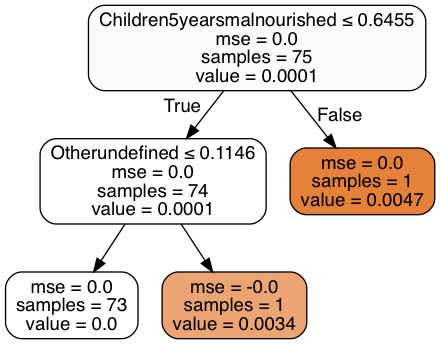

In [29]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(best, out_file=dot_data,  
                         feature_names=[elem for elem in estimates[estimates['sig'] >=.1]['vars'].unique()],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

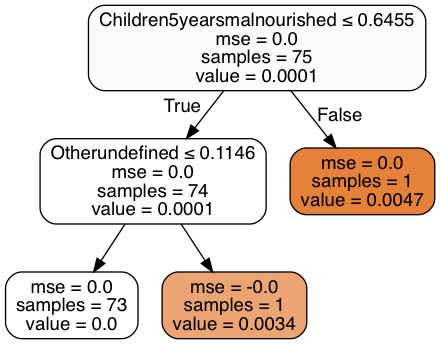

In [30]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=[elem for elem in estimates[estimates['sig'] >=.1]['vars'].unique()],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### try models without castes, only caste_diversity

In [31]:
cd = x.iloc[:,16:]

In [32]:
std2 = pd.concat([cd, std],axis=1)

In [33]:
rfr = RandomForestRegressor(random_state=100,oob_score=True)
rfr.fit(std2.iloc[:,1:7], std2['STD'])
drop_castes_score_std = rfr.score(std2.iloc[:,1:7], std2['STD'])
print drop_castes_score_std
drop_castes_oob_score_std = rfr.oob_score_
print drop_castes_oob_score_std

0.849781423533
-0.380113863743


In [34]:
hiv2 = pd.concat([cd, hiv],axis=1)

In [35]:
rfr = RandomForestRegressor(random_state=100,oob_score=True)
rfr.fit(hiv2.iloc[:,1:7], hiv2['HIVAIDS'])
drop_castes_score_hiv = rfr.score(hiv2.iloc[:,1:7], hiv2['HIVAIDS'])
print drop_castes_score_hiv
drop_castes_oob_score_hiv = rfr.oob_score_
print drop_castes_oob_score_hiv

0.809571903757
-0.141969384382


### try models without caste_diversity, only castes

In [36]:
c = x.drop('caste_diversity',axis=1)

In [37]:
std2 = pd.concat([c, std],axis=1)

In [38]:
rfr = RandomForestRegressor(random_state=100,oob_score=True)
rfr.fit(std2.iloc[:,1:22], std2['STD'])
drop_caste_div_score_std = rfr.score(std2.iloc[:,1:22], std2['STD'])
print drop_caste_div_score_std
drop_caste_div_oob_score_std = rfr.oob_score_
print drop_caste_div_oob_score_std

0.823025975137
-0.543821323312


In [39]:
hiv2 = pd.concat([c, hiv],axis=1)

In [40]:
rfr = RandomForestRegressor(random_state=100,oob_score=True)
rfr.fit(hiv2.iloc[:,1:22], hiv2['HIVAIDS'])
drop_caste_div_score_hiv = rfr.score(hiv2.iloc[:,1:22], hiv2['HIVAIDS'])
print drop_caste_div_score_hiv
drop_caste_div_oob_score_hiv = rfr.oob_score_
print drop_caste_div_oob_score_hiv

0.789376336264
-0.272070565759


### preliminary results

In [55]:
results = pd.DataFrame()
results['disease'] = ['hiv','std']
results['all_vars_score'] = [all_vars_score_hiv, all_vars_score_std]
#results['all_vars_oob'] = [all_vars_oob_score_hiv, all_vars_oob_score_std]
results['no_castes_score'] = [drop_castes_score_hiv, drop_castes_score_std]
#results['no_castes_oob'] = [drop_castes_oob_score_hiv, drop_castes_oob_score_std]
results['no_caste_div_score'] = [drop_caste_div_score_hiv, drop_caste_div_score_std]
#results['no_caste_div_oob'] = [drop_caste_div_oob_score_hiv, drop_caste_div_oob_score_std]

In [56]:
results = results.T
results.columns = results.iloc[0,:]
results = results.iloc[1:,:]

In [57]:
results

disease,hiv,std
all_vars_score,0.789376,0.832595
no_castes_score,0.809572,0.849781
no_caste_div_score,0.789376,0.823026


The random forest model which fits the data best is that which drops the castes, with fit scores of .81 and .85 for HIV and STD respectively.